In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Set width, height and grid
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)  
sns.set_style('darkgrid')

## IMPORT/LOAD FILES

In [2]:
customer_info = pd.read_csv('Data10/customer_info.csv')
customer_case = pd.read_csv('Data10/customer_cases.csv')
customer_prod = pd.read_csv('Data10/customer_product.csv')
prod_info = pd.read_csv('Data10/product_info.csv')

## Data Preprocessing


In [3]:
customer_info.head()

,Unnamed: 0,customer_id,age,gender
0,1,C2448,76,female
1,2,C2449,61,male
2,3,C2450,58,female
3,4,C2451,62,female
4,5,C2452,71,male


In [4]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508932 entries, 0 to 508931
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   508932 non-null  int64 
 1   customer_id  508932 non-null  object
 2   age          508932 non-null  int64 
 3   gender       508932 non-null  object
dtypes: int64(2), object(2)
memory usage: 15.5+ MB


In [5]:
# Drop unnecessary column and check for duplicates

customer_info.drop(columns="Unnamed: 0", inplace=True)

customer_info[customer_info["customer_id"].duplicated()]

,customer_id,age,gender


In [6]:
customer_info["gender"].unique()

array(['female', 'male'], dtype=object)

In [7]:
customer_info["gender"].value_counts()

male      309930
female    199002
Name: gender, dtype: int64

In [8]:
customer_prod.head()

,Unnamed: 0,customer_id,product,signup_date_time,cancel_date_time
0,1,C2448,prd_1,2017-01-01 10:35:09,NaN
1,2,C2449,prd_1,2017-01-01 11:39:29,2021-09-05 10:00:02
2,3,C2450,prd_1,2017-01-01 11:42:00,2019-01-13 16:24:55
3,4,C2451,prd_2,2017-01-01 13:32:08,NaN
4,5,C2452,prd_1,2017-01-01 13:57:30,2021-06-28 18:06:01


In [9]:
customer_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508932 entries, 0 to 508931
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Unnamed: 0        508932 non-null  int64 
 1   customer_id       508932 non-null  object
 2   product           508932 non-null  object
 3   signup_date_time  508932 non-null  object
 4   cancel_date_time  112485 non-null  object
dtypes: int64(1), object(4)
memory usage: 19.4+ MB


In [10]:
# Drop the unnecessary column and check for duplicates 
customer_prod.drop(columns="Unnamed: 0", axis=1, inplace=True)

list_check = ['customer_id', 'product', 'signup_date_time']
customer_prod[customer_prod.duplicated(subset=list_check, keep='first')]

,customer_id,product,signup_date_time,cancel_date_time


In [11]:
# Rename columns and fix the data types

customer_prod.rename(columns={"signup_date_time":"signup_date", "cancel_date_time":"cancel_date"}, inplace=True)

customer_prod["signup_date"] = customer_prod["signup_date"].astype("datetime64").dt.date.astype("datetime64")
customer_prod["cancel_date"] = customer_prod["cancel_date"].astype("datetime64").dt.date.astype("datetime64")

In [12]:
# Create a new column to flag ongoing cases
customer_prod['ongoing_case'] = customer_prod['cancel_date'].isna()

# Set ongoing cases using placeholder date 
customer_prod["cancel_date"].fillna(datetime(2022,2,1), inplace=True)

In [13]:
# Check for duplicates in customer id
customer_prod[customer_prod.duplicated(subset=["customer_id"], keep="first")]

,customer_id,product,signup_date,cancel_date,ongoing_case


In [14]:
# Create new month, year and duration columns

customer_prod["signup_month"] = customer_prod["signup_date"].dt.month
customer_prod["signup_year"] = customer_prod["signup_date"].dt.year
customer_prod["cancel_month"] = customer_prod["cancel_date"].dt.month
customer_prod["cancel_year"] = customer_prod["cancel_date"].dt.year
customer_prod["duration"] = ( customer_prod["cancel_date"] - customer_prod["signup_date"] ).dt.days 


In [15]:
customer_prod.describe(include="all", datetime_is_numeric=True)

,customer_id,product,signup_date,cancel_date,ongoing_case,signup_month,signup_year,cancel_month,cancel_year,duration
count,508932,508932,508932,508932,508932,508932.000000,508932.000000,508932.000000,508932.000000,508932.000000
unique,508932,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,C2448,prd_1,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
freq,1,325649,NaN,NaN,396447,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2020-02-15 21:31:40.969087744,2021-10-15 18:47:58.064653056,NaN,5.681596,2019.696732,3.135462,2021.600882,607.886309
min,NaN,NaN,2017-01-01 00:00:00,2017-01-08 00:00:00,NaN,1.000000,2017.000000,1.000000,2017.000000,1.000000
25%,NaN,NaN,2019-04-18 00:00:00,2022-02-01 00:00:00,NaN,3.000000,2019.000000,2.000000,2022.000000,264.000000
50%,NaN,NaN,2020-04-25 00:00:00,2022-02-01 00:00:00,NaN,5.000000,2020.000000,2.000000,2022.000000,529.000000
75%,NaN,NaN,2021-03-08 00:00:00,2022-02-01 00:00:00,NaN,8.000000,2021.000000,2.000000,2022.000000,884.000000
max,NaN,NaN,2021-12-31 00:00:00,2022-02-01 00:00:00,NaN,12.000000,2021.000000,12.000000,2022.000000,1857.000000


In [16]:
prod_info.head()

,product_id,name,price,billing_cycle
0,prd_1,annual_subscription,1200,12
1,prd_2,monthly_subscription,125,1


In [17]:
prod_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     2 non-null      object
 1   name           2 non-null      object
 2   price          2 non-null      int64 
 3   billing_cycle  2 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 192.0+ bytes


In [18]:
customer_case.head()

,Unnamed: 0,case_id,date_time,customer_id,channel,reason
0,1,CC101,2017-01-01 10:32:03,C2448,phone,signup
1,2,CC102,2017-01-01 11:35:47,C2449,phone,signup
2,3,CC103,2017-01-01 11:37:09,C2450,phone,signup
3,4,CC104,2017-01-01 13:28:14,C2451,phone,signup
4,5,CC105,2017-01-01 13:52:22,C2452,phone,signup


In [19]:
customer_case.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330512 entries, 0 to 330511
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Unnamed: 0   330512 non-null  int64 
 1   case_id      330512 non-null  object
 2   date_time    330512 non-null  object
 3   customer_id  330512 non-null  object
 4   channel      330512 non-null  object
 5   reason       330512 non-null  object
dtypes: int64(1), object(5)
memory usage: 15.1+ MB


In [20]:
# Drop the unnecessary column

customer_case.drop("Unnamed: 0", axis=1, inplace=True)
customer_case.head()

,case_id,date_time,customer_id,channel,reason
0,CC101,2017-01-01 10:32:03,C2448,phone,signup
1,CC102,2017-01-01 11:35:47,C2449,phone,signup
2,CC103,2017-01-01 11:37:09,C2450,phone,signup
3,CC104,2017-01-01 13:28:14,C2451,phone,signup
4,CC105,2017-01-01 13:52:22,C2452,phone,signup


In [21]:
# Rename the date column

customer_case.rename(columns = {"date_time":"date"}, inplace=True)

In [22]:
# Convert to datetime object and reset time

customer_case["date"] = customer_case["date"].astype("datetime64").dt.date.astype("datetime64")
customer_case["month"] = customer_case["date"].dt.month.astype("int64")
customer_case["year"] = customer_case["date"].dt.year.astype("int64")
customer_case.head()

,case_id,date,customer_id,channel,reason,month,year
0,CC101,2017-01-01,C2448,phone,signup,1,2017
1,CC102,2017-01-01,C2449,phone,signup,1,2017
2,CC103,2017-01-01,C2450,phone,signup,1,2017
3,CC104,2017-01-01,C2451,phone,signup,1,2017
4,CC105,2017-01-01,C2452,phone,signup,1,2017


In [23]:
customer_case["reason"].value_counts()

support    200985
signup     129527
Name: reason, dtype: int64

In [24]:
# Check for duplicate cases

customer_case[customer_case.duplicated([ "customer_id"], keep="first")]

,case_id,date,customer_id,channel,reason,month,year
110,CC211,2017-01-03,C2477,phone,support,1,2017
457,CC558,2017-01-11,C2713,phone,support,1,2017
466,CC567,2017-01-11,C2825,phone,support,1,2017
506,CC607,2017-01-12,C2672,phone,support,1,2017
537,CC638,2017-01-13,C2506,phone,support,1,2017
...,...,...,...,...,...,...,...
330501,CC330602,2021-12-31,C118306,phone,support,12,2021
330504,CC330605,2021-12-31,C124076,email,support,12,2021
330505,CC330606,2021-12-31,C126469,email,support,12,2021
330506,CC330607,2021-12-31,C120740,email,support,12,2021


In [25]:
# Check for duplicate customer ids

customer_case[customer_case.duplicated(["customer_id"], keep="first")]

,case_id,date,customer_id,channel,reason,month,year
110,CC211,2017-01-03,C2477,phone,support,1,2017
457,CC558,2017-01-11,C2713,phone,support,1,2017
466,CC567,2017-01-11,C2825,phone,support,1,2017
506,CC607,2017-01-12,C2672,phone,support,1,2017
537,CC638,2017-01-13,C2506,phone,support,1,2017
...,...,...,...,...,...,...,...
330501,CC330602,2021-12-31,C118306,phone,support,12,2021
330504,CC330605,2021-12-31,C124076,email,support,12,2021
330505,CC330606,2021-12-31,C126469,email,support,12,2021
330506,CC330607,2021-12-31,C120740,email,support,12,2021


In [26]:
customer_prod[~customer_prod['customer_id'].isin(customer_case["customer_id"])]

,customer_id,product,signup_date,cancel_date,ongoing_case,signup_month,signup_year,cancel_month,cancel_year,duration
129527,C131975,prd_2,2017-01-01,2022-02-01,True,1,2017,2,2022,1857
129528,C131976,prd_1,2017-01-01,2022-02-01,True,1,2017,2,2022,1857
129529,C131977,prd_1,2017-01-01,2022-02-01,True,1,2017,2,2022,1857
129531,C131979,prd_1,2017-01-01,2021-10-09,False,1,2017,10,2021,1742
129533,C131981,prd_2,2017-01-01,2019-08-14,False,1,2017,8,2019,955
...,...,...,...,...,...,...,...,...,...,...
508927,C511375,prd_2,2021-12-31,2022-02-01,True,12,2021,2,2022,32
508928,C511376,prd_2,2021-12-31,2022-02-01,True,12,2021,2,2022,32
508929,C511377,prd_2,2021-12-31,2022-02-01,True,12,2021,2,2022,32
508930,C511378,prd_2,2021-12-31,2022-02-01,True,12,2021,2,2022,32


In [27]:
customer_prod[customer_prod["customer_id"]=="C132426"]

,customer_id,product,signup_date,cancel_date,ongoing_case,signup_month,signup_year,cancel_month,cancel_year,duration
129978,C132426,prd_1,2017-01-05,2022-02-01,True,1,2017,2,2022,1853


In [28]:
customer_case[customer_case["customer_id"]=="C132426"]

,case_id,date,customer_id,channel,reason,month,year
1267,CC1368,2017-01-30,C132426,phone,support,1,2017
1488,CC1589,2017-02-02,C132426,phone,support,2,2017


In [29]:
# Check for duplicate customer ids with the reason value

customer_case[customer_case.duplicated([ "customer_id","reason"], keep="first")]

,case_id,date,customer_id,channel,reason,month,year
1488,CC1589,2017-02-02,C132426,phone,support,2,2017
1646,CC1747,2017-02-06,C3659,phone,support,2,2017
1845,CC1946,2017-02-09,C2825,phone,support,2,2017
2874,CC2975,2017-03-03,C133020,phone,support,3,2017
3853,CC3954,2017-03-21,C4066,phone,support,3,2017
...,...,...,...,...,...,...,...
330484,CC330585,2021-12-31,C126846,phone,support,12,2021
330485,CC330586,2021-12-31,C426137,phone,support,12,2021
330492,CC330593,2021-12-31,C284425,phone,support,12,2021
330496,CC330597,2021-12-31,C475332,phone,support,12,2021


In [30]:
# Check for duplicate customer ids with the reason value

customer_case[customer_case.duplicated([ "customer_id","reason","date"], keep="first")]

,case_id,date,customer_id,channel,reason,month,year
3990,CC4091,2017-03-23,C3882,phone,support,3,2017
7792,CC7893,2017-05-29,C136181,phone,support,5,2017
10688,CC10789,2017-07-20,C5542,phone,support,7,2017
15700,CC15801,2017-11-02,C151322,phone,support,11,2017
16647,CC16748,2017-11-25,C145151,phone,support,11,2017
...,...,...,...,...,...,...,...
315147,CC315248,2021-11-15,C113178,phone,support,11,2021
326023,CC326124,2021-12-17,C496279,phone,support,12,2021
327525,CC327626,2021-12-22,C404975,phone,support,12,2021
328231,CC328332,2021-12-24,C501369,phone,support,12,2021


## Exploratory Analysis

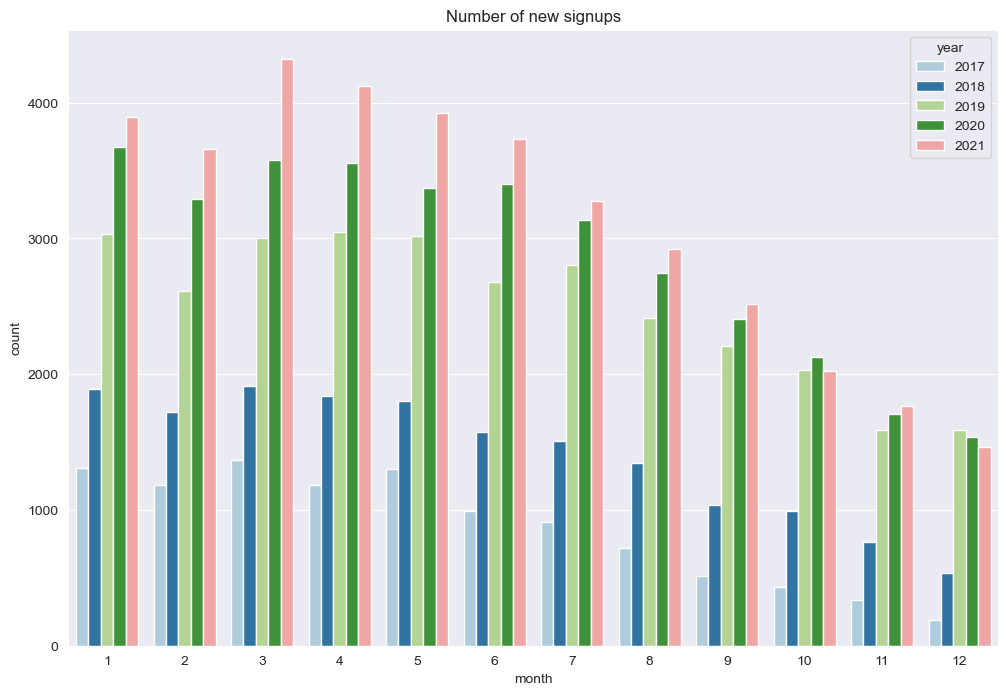

In [31]:
signups_plot = sns.countplot(x = "month",data= customer_case[customer_case["reason"] == "signup"],
                        hue="year", palette="Paired")
signups_plot.set(title="Number of new signups");

In [32]:
x = customer_info.shape
y = customer_prod.shape

f"customer info df shape is {x} and customer product df shape is {y}"

'customer info df shape is (508932, 3) and customer product df shape is (508932, 10)'

In [33]:
customer_prod.head()

,customer_id,product,signup_date,cancel_date,ongoing_case,signup_month,signup_year,cancel_month,cancel_year,duration
0,C2448,prd_1,2017-01-01,2022-02-01,True,1,2017,2,2022,1857
1,C2449,prd_1,2017-01-01,2021-09-05,False,1,2017,9,2021,1708
2,C2450,prd_1,2017-01-01,2019-01-13,False,1,2017,1,2019,742
3,C2451,prd_2,2017-01-01,2022-02-01,True,1,2017,2,2022,1857
4,C2452,prd_1,2017-01-01,2021-06-28,False,1,2017,6,2021,1639


In [34]:
customer_info.head()

,customer_id,age,gender
0,C2448,76,female
1,C2449,61,male
2,C2450,58,female
3,C2451,62,female
4,C2452,71,male


In [35]:
customer_merged = pd.merge(customer_info, customer_prod, on="customer_id")
customer_merged.head(10)

,customer_id,age,gender,product,signup_date,cancel_date,ongoing_case,signup_month,signup_year,cancel_month,cancel_year,duration
0,C2448,76,female,prd_1,2017-01-01,2022-02-01,True,1,2017,2,2022,1857
1,C2449,61,male,prd_1,2017-01-01,2021-09-05,False,1,2017,9,2021,1708
2,C2450,58,female,prd_1,2017-01-01,2019-01-13,False,1,2017,1,2019,742
3,C2451,62,female,prd_2,2017-01-01,2022-02-01,True,1,2017,2,2022,1857
4,C2452,71,male,prd_1,2017-01-01,2021-06-28,False,1,2017,6,2021,1639
5,C2453,56,male,prd_1,2017-01-01,2022-02-01,True,1,2017,2,2022,1857
6,C2454,53,male,prd_1,2017-01-01,2021-06-01,False,1,2017,6,2021,1612
7,C2455,53,female,prd_1,2017-01-02,2022-02-01,True,1,2017,2,2022,1856
8,C2456,70,female,prd_1,2017-01-02,2017-06-08,False,1,2017,6,2017,157
9,C2457,68,male,prd_1,2017-01-02,2017-11-25,False,1,2017,11,2017,327


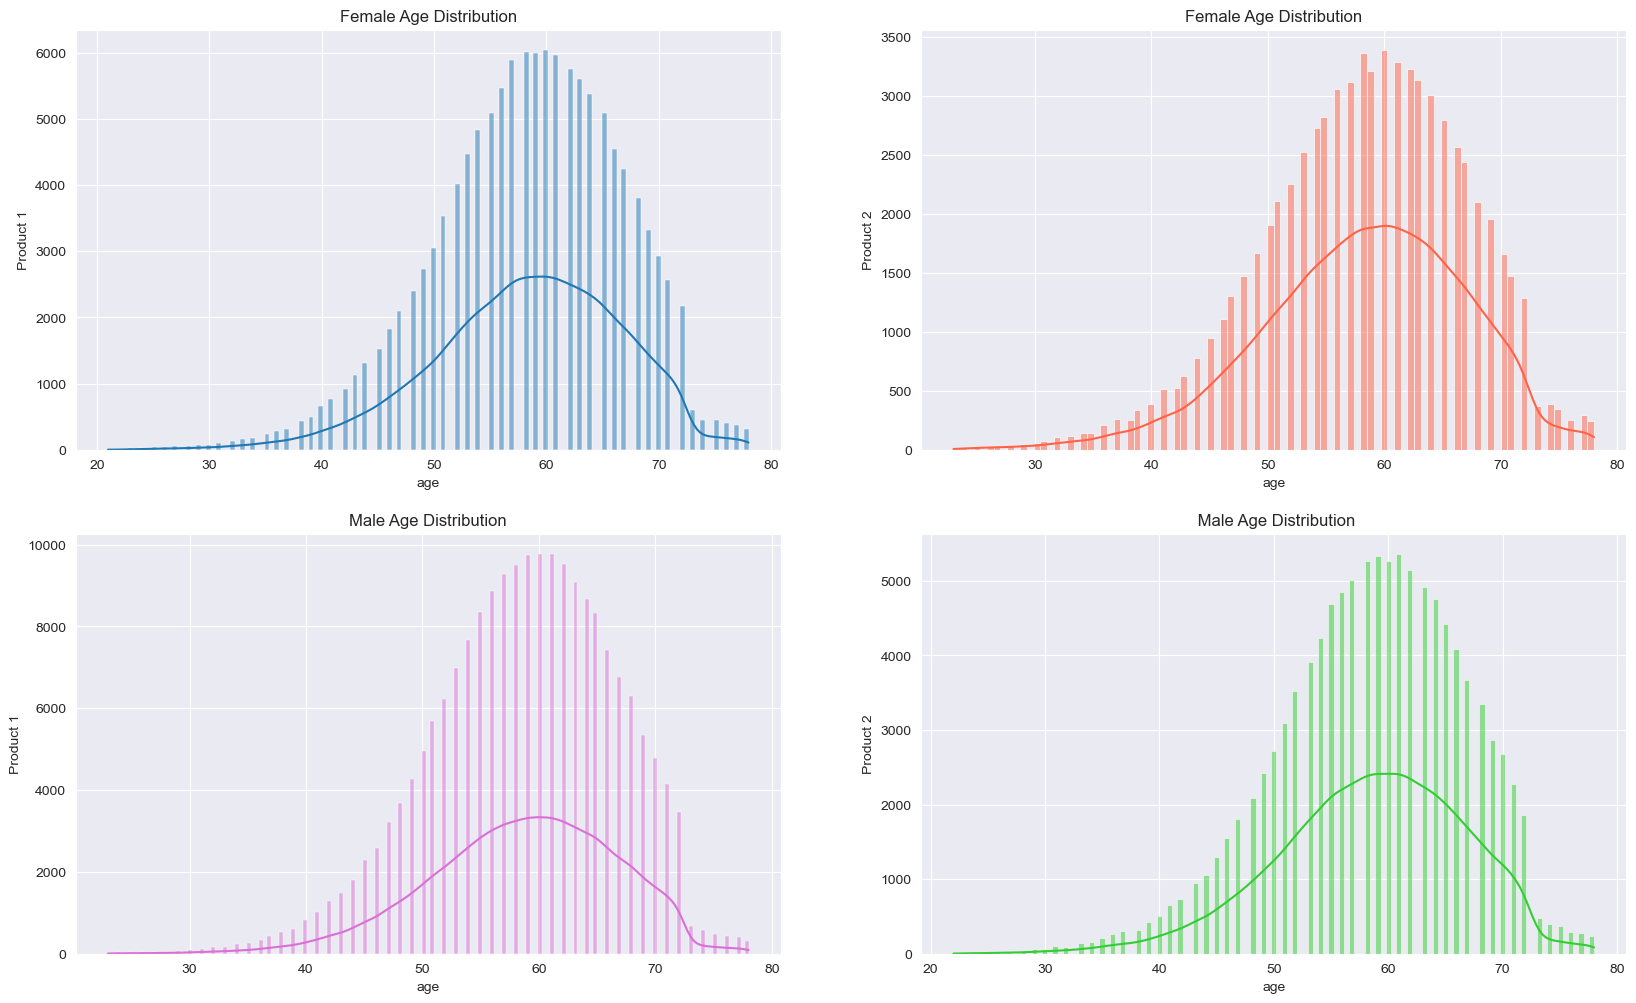

In [42]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

fem_prod1_plot = sns.histplot(x = "age", data=customer_merged[ (customer_merged["gender"] == "female") & 
                                                    (customer_merged["product"]=="prd_1")],
                                                        kde=True, ax= axs[0][0]) 
fem_prod1_plot.set(title="Female Age Distribution", ylabel= "Product 1")

fem_prod2_plot  = sns.histplot(x = "age", data=customer_merged[ (customer_merged["gender"] == "female") & 
                                                    (customer_merged["product"]=="prd_2")], 
                                                        kde=True, ax=axs[0][1], color="#FF6347")
fem_prod2_plot.set(title="Female Age Distribution", ylabel="Product 2")

m_prod1_plot = sns.histplot(x = "age", data=customer_merged[ (customer_merged["gender"] == "male") & 
                                                    (customer_merged["product"]=="prd_1")],
                                                        kde=True, ax=axs[1][0], color="#DA70D6")
m_prod1_plot.set(title="Male Age Distribution", ylabel="Product 1")

m_prod2_plot = sns.histplot(x = "age", data=customer_merged[ (customer_merged["gender"] == "male") & 
                                                    (customer_merged["product"]=="prd_2")], 
                                                        kde=True, ax=axs[1][1], color="#32CD32")
m_prod2_plot.set(title=" Male Age Distribution", ylabel="Product 2");

The target age group for both  genders and both product A and B is 50-70.

In [43]:
customer_merged["duration_years"] = round( customer_merged["duration"]/365, 2)
customer_merged.head(5)

,customer_id,age,gender,product,signup_date,cancel_date,ongoing_case,signup_month,signup_year,cancel_month,cancel_year,duration,duration_years
0,C2448,76,female,prd_1,2017-01-01,2022-02-01,True,1,2017,2,2022,1857,5.09
1,C2449,61,male,prd_1,2017-01-01,2021-09-05,False,1,2017,9,2021,1708,4.68
2,C2450,58,female,prd_1,2017-01-01,2019-01-13,False,1,2017,1,2019,742,2.03
3,C2451,62,female,prd_2,2017-01-01,2022-02-01,True,1,2017,2,2022,1857,5.09
4,C2452,71,male,prd_1,2017-01-01,2021-06-28,False,1,2017,6,2021,1639,4.49


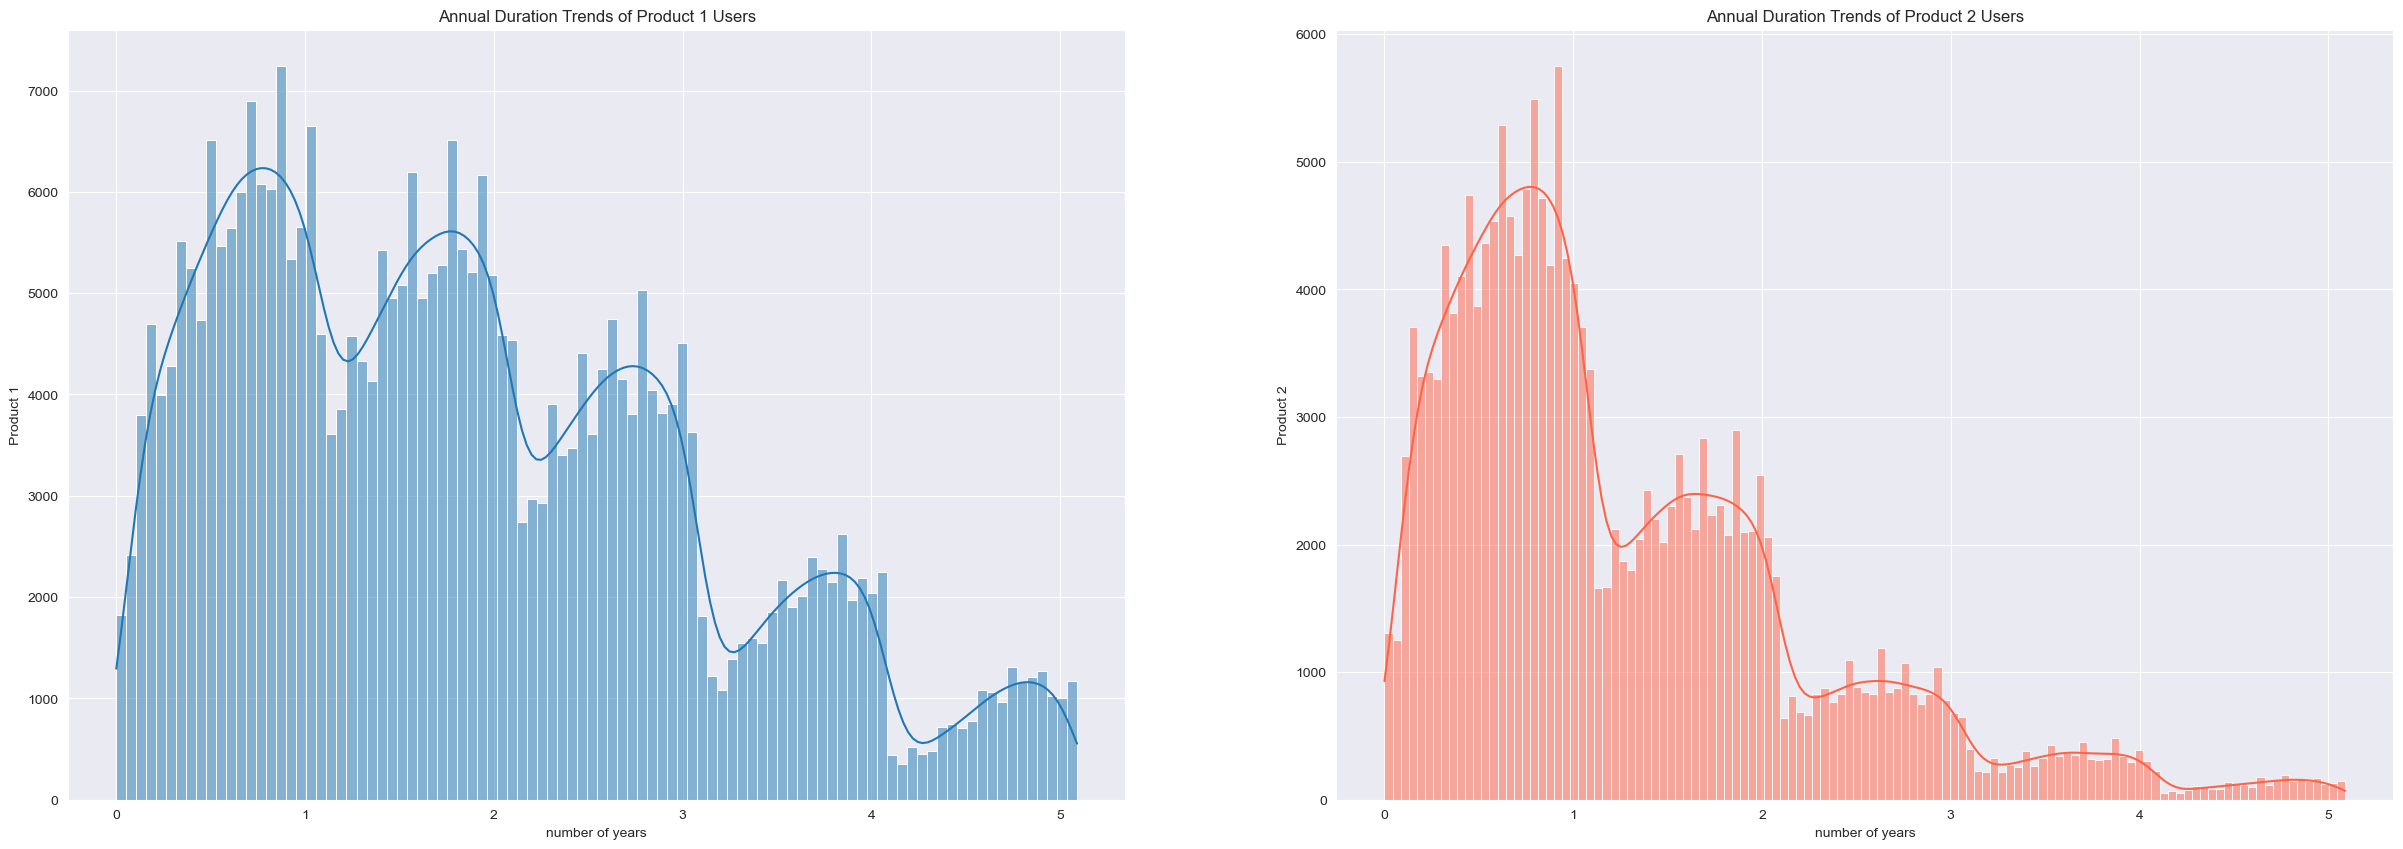

In [44]:
fig, axis = plt.subplots(1, 2, figsize=(30, 10))


dur_prod1 = sns.histplot(x="duration_years", data = customer_merged[customer_merged["product"]== "prd_1"], 
                         kde=True, ax=axis[0] )
dur_prod1.set(title="Annual Duration Trends of Product 1 Users", ylabel="Product 1", xlabel="number of years")


dur_prod2 = sns.histplot(x= "duration_years", data = customer_merged[customer_merged["product"]=="prd_2"], 
                         color="#FF6347", kde=True,ax=axis[1])
dur_prod2.set(title="Annual Duration Trends of Product 2 Users", ylabel="Product 2", xlabel="number of years");

# Customer Acquisition, Retention, and Churn Analysis


In [45]:
# Calculate the number of suscription signups

signups_df = customer_prod.groupby(["signup_year","signup_month"]).size().reset_index(name="num_of_signups")
signups_df.head(10)

,signup_year,signup_month,num_of_signups
0,2017,1,3769
1,2017,2,3476
2,2017,3,3968
3,2017,4,3614
4,2017,5,3659
5,2017,6,3016
6,2017,7,2608
7,2017,8,2215
8,2017,9,1616
9,2017,10,1287


In [46]:
# Calculate the number of suscription cancelations

cancel_df = customer_prod[ customer_prod["ongoing_case"]==False].groupby(["cancel_year", "cancel_month"]
                                                             ).size().reset_index(name="num_of_cancels")
cancel_df.head(10)

,cancel_year,cancel_month,num_of_cancels
0,2017,1,12
1,2017,2,39
2,2017,3,90
3,2017,4,90
4,2017,5,124
5,2017,6,155
6,2017,7,176
7,2017,8,200
8,2017,9,193
9,2017,10,260


In [109]:
# Calculate the number of suscriptions signups per product

product_1_count = customer_prod[customer_prod["product"]==
                                "prd_1"].groupby(["signup_year","signup_month"]).size().reset_index(name=
                                                                                                    "prd_1")

product_2_count = customer_prod[customer_prod["product"]==
                                "prd_2"].groupby(["signup_year","signup_month"]).size().reset_index(name=
                                                                                                 "prd_2")

product_cnt_df = pd.merge(product_1_count,product_2_count,on=["signup_year","signup_month"])
product_cnt_df.head(10)

,signup_year,signup_month,prd_1,prd_2
0,2017,1,3093,676
1,2017,2,2902,574
2,2017,3,3276,692
3,2017,4,2960,654
4,2017,5,3037,622
5,2017,6,2533,483
6,2017,7,2148,460
7,2017,8,1817,398
8,2017,9,1342,274
9,2017,10,1041,246


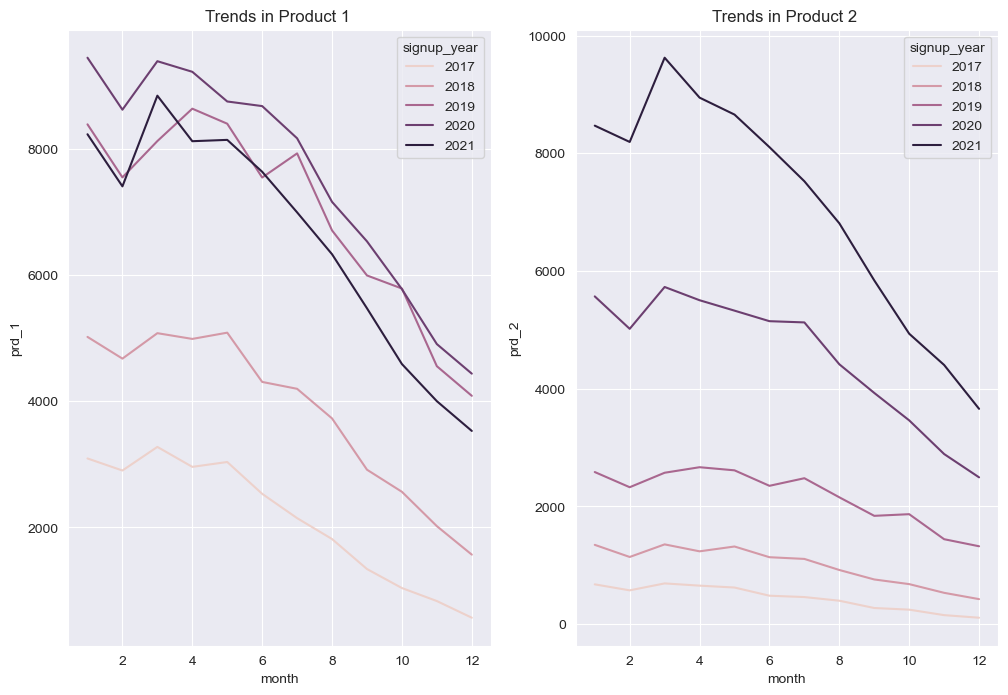

In [48]:
# Graph trends in Product 1 and 2

fig, axs = plt.subplots(1, 2, figsize=(12, 8))
product_graph1 = sns.lineplot(x="signup_month",y = "prd_1", data=product_cnt_df, hue="signup_year", ax=axs[0])
product_graph1.set(title="Trends in Product 1 ", xlabel="month")
product_graph2= sns.lineplot(x="signup_month",y = "prd_2", data=product_cnt_df, hue="signup_year", ax=axs[1])
product_graph2.set(title="Trends in Product 2 ", xlabel="month");

In [49]:
summary = [signups_df, cancel_df.iloc[:, 2:3], product_cnt_df.iloc[:, 2:4] ]
summary_df = pd.concat(summary, axis=1)
summary_df.rename(columns={"signup_year": "year", "signup_month": "month"}, inplace=True)
summary_df.head()

,year,month,num_of_signups,num_of_cancels,prd_1,prd_2
0,2017,1,3769,12,3093,676
1,2017,2,3476,39,2902,574
2,2017,3,3968,90,3276,692
3,2017,4,3614,90,2960,654
4,2017,5,3659,124,3037,622


In [50]:
# Calcuate the number of cumulative number of custumeres and signup and cancelation rates

summary_df["curr_customers"] = summary_df['num_of_signups'
                                            ].cumsum() -summary_df['num_of_cancels'].cumsum()


summary_df["mo_signup_rate"] = round( summary_df["num_of_signups"] / summary_df["curr_customers"], 4)

summary_df["mo_cancel_rate"] = round( summary_df["num_of_cancels"] / summary_df["curr_customers"], 4)

# Setting the value in the first row in rate columns
summary_df.at[0, 'mo_signup_rate'] = 0.0
summary_df.at[0, 'mo_cancel_rate'] = 0.0

summary_df.head(10)

,year,month,num_of_signups,num_of_cancels,prd_1,prd_2,curr_customers,mo_signup_rate,mo_cancel_rate
0,2017,1,3769,12,3093,676,3757,0.0000,0.0000
1,2017,2,3476,39,2902,574,7194,0.4832,0.0054
2,2017,3,3968,90,3276,692,11072,0.3584,0.0081
3,2017,4,3614,90,2960,654,14596,0.2476,0.0062
4,2017,5,3659,124,3037,622,18131,0.2018,0.0068
5,2017,6,3016,155,2533,483,20992,0.1437,0.0074
6,2017,7,2608,176,2148,460,23424,0.1113,0.0075
7,2017,8,2215,200,1817,398,25439,0.0871,0.0079
8,2017,9,1616,193,1342,274,26862,0.0602,0.0072
9,2017,10,1287,260,1041,246,27889,0.0461,0.0093


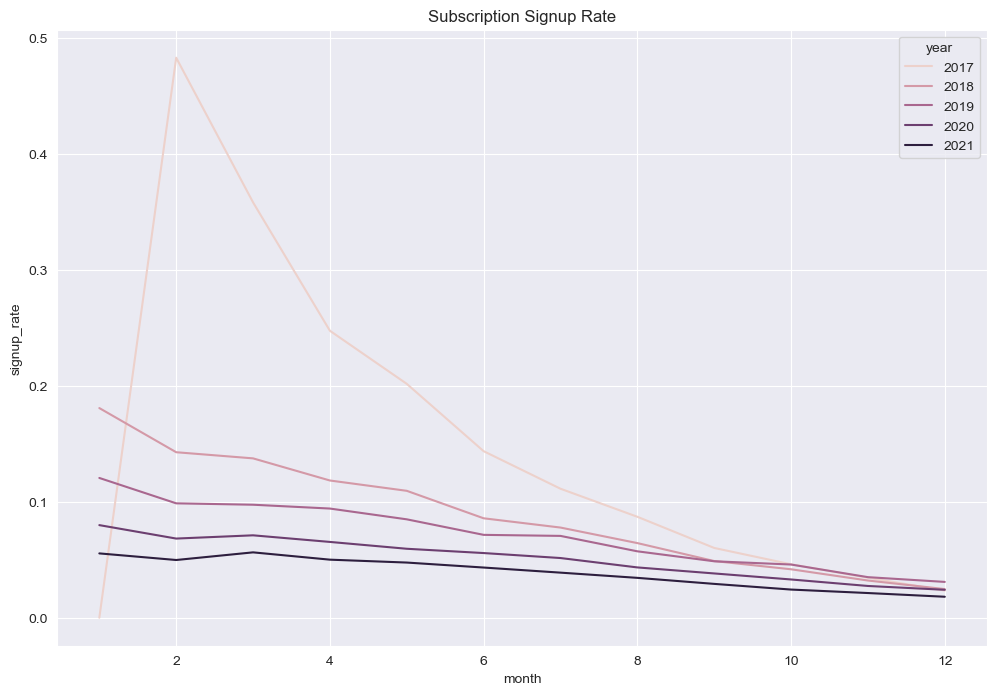

In [51]:
# Graph signup rate

signup_graph = sns.lineplot(x="month", y="mo_signup_rate", data=summary_df, hue="year")
signup_graph.set(title="Subscription Signup Rate",ylabel='signup_rate');

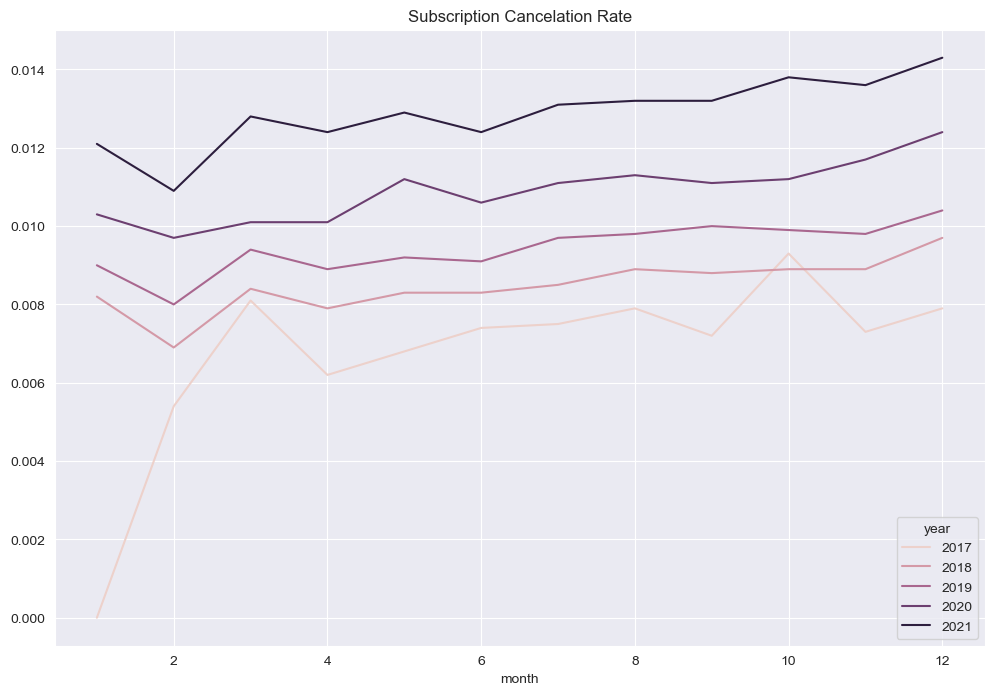

In [117]:
# Graph cancelation rate

cancel_graph = sns.lineplot(x="month", y="mo_cancel_rate", data=summary_df, hue="year")
cancel_graph.set(title="Subscription Cancelation Rate", ylabel="");

# Cost Analysis 

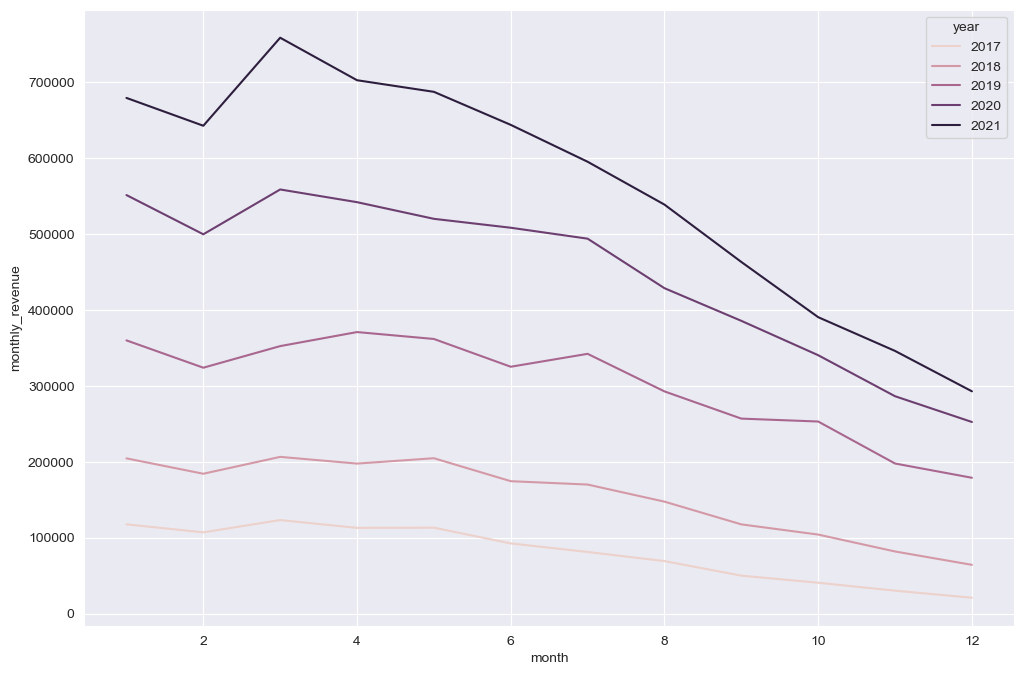

In [53]:
summary_df["monthly_revenue"] = summary_df["prd_1"] * 25.99 + summary_df["prd_2"] * 54.99

revenue_graph = sns.lineplot(x="month", y="monthly_revenue", data=summary_df, hue="year")

In [78]:
annual_summary = summary_df.groupby("year").agg({"num_of_signups": "sum",
                                                "num_of_cancels": "sum",
                                                "prd_1": "sum",
                                                "prd_2": "sum",
                                                "monthly_revenue": "sum",
                                                "mo_signup_rate": "mean",
                                                "mo_cancel_rate":"mean"}).reset_index()
annual_summary['newly_acquired_customers'] = annual_summary['num_of_signups'] - annual_summary['num_of_cancels']

annual_summary["prd1_sales"] = annual_summary["prd_1"]* 25.99
annual_summary["prd2_sales"] = annual_summary["prd_2"]* 54.99

In [79]:
annual_summary.head()

,year,num_of_signups,num_of_cancels,prd_1,prd_2,monthly_revenue,mo_signup_rate,mo_cancel_rate,newly_acquired_customers,prd1_sales,prd2_sales
0,2017,30896,1779,25555,5341,957876.04,0.149775,0.006750,29117,664174.45,293701.59
1,2018,58099,6447,46139,11960,1856833.01,0.088717,0.008475,51652,1199152.61,657680.40
2,2019,109876,15841,83657,26219,3616028.24,0.071317,0.009433,94035,2174245.43,1441782.81
3,2020,145642,32500,91038,54604,5368751.58,0.051467,0.010900,113142,2366077.62,3002673.96
4,2021,164419,55918,79260,85159,6742860.81,0.039075,0.012892,108501,2059967.40,4682893.41


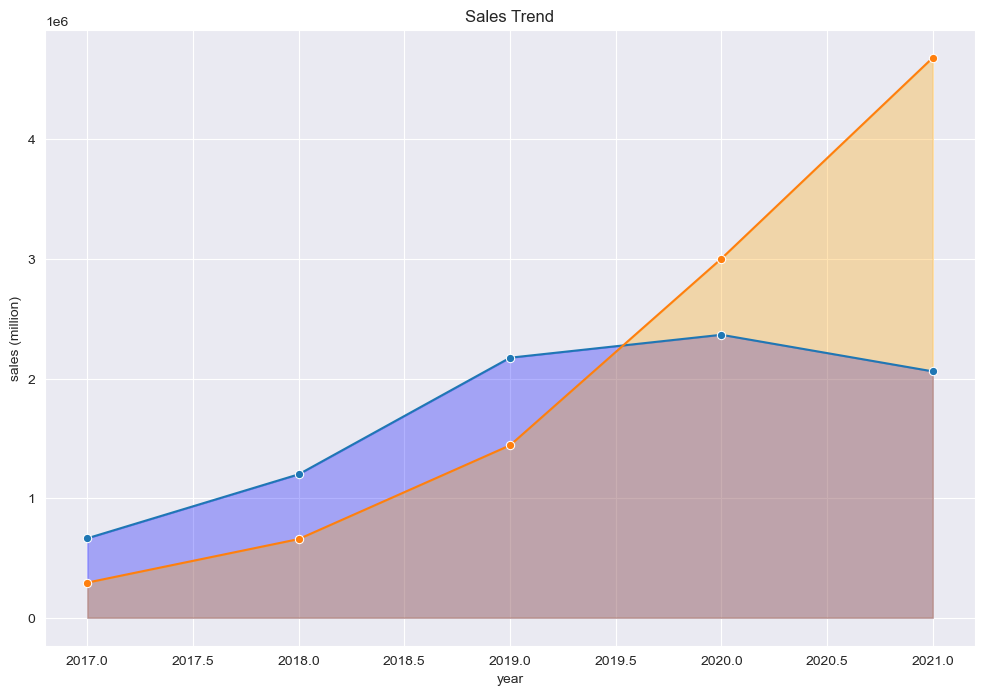

In [112]:
# Plot Sales Trend

a = sns.lineplot(x="year", y = "prd1_sales", data=annual_summary,marker='o')
a.set(title="Sales Trend", ylabel="sales (million)")
plt.fill_between(annual_summary['year'], annual_summary['prd1_sales'], color='blue', alpha=0.3)  

b = sns.lineplot(x="year", y = "prd2_sales", data=annual_summary,marker='o')
plt.fill_between(annual_summary['year'], annual_summary['prd2_sales'], color='orange', alpha=0.3)


In [108]:
annual_summary.loc[:, ['year', 'prd1_sales',"prd2_sales"]]

,year,prd1_sales,prd2_sales
0,2017,664174.45,293701.59
1,2018,1199152.61,657680.40
2,2019,2174245.43,1441782.81
3,2020,2366077.62,3002673.96
4,2021,2059967.40,4682893.41
